# Social networks
I basically use two sources for this, Bovet and programminghistorian

What I want to find out is basically the following:
1. Are there obvious social clusters within our network
2. If so, how big are they and how strong are the relationships
3. Within these networks, who are the most important tweeters

We also want to know the following general information:
- Which users are most important, irrespective of network

## Changes I need to make
- Bring strong connections up front - say not really informative but keep an eye out for key players
- Then do overview of degrees and centrality - explain why
- Get components + communities
- Do page ranking - explain why and compare with degrees

In [104]:
import datetime
import pandas as pd
import numpy as np

In [105]:
all_tweets = pd.read_csv("./DataSources/TwitterData/cleaned_tweets.csv")
print(all_tweets.shape)
all_tweets.head()

(14687, 25)


,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,...,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins
0,0,1420355029081395203,2021-07-28 12:06:42,865262041103302656,Chris Myers,myerschrismyer1,Richmond North Yorkshire,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 12:06:42,2021-07-28 12:00:00,28
1,1,1420354120041615364,2021-07-28 12:03:05,229645453,Emily Sheffield,emilysheffield,London,RT @NaheedMajeed: Spot on @standardnews With L...,NaN,NaN,...,['@standardnews'],[],Spot on With London on track to break record...,"['spot', 'on', 'with', 'london', 'on', 'track'...","['spot', 'track', 'break', 'record', 'teenage'...","['spot', 'track', 'break', 'record', 'teenage'...",spot track break record teenage murdersstop se...,2021-07-28 12:03:05,2021-07-28 12:00:00,28
2,2,1420351785156366337,2021-07-28 11:53:49,2843896642,Basilewitch,basilewitch,France,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:53:49,2021-07-28 00:00:00,28
3,3,1420350419449094148,2021-07-28 11:48:23,556315551,Dean Cowcher,DeanCowcher,Bexleyheath London England,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 11:48:23,2021-07-28 00:00:00,28
4,4,1420349615954669574,2021-07-28 11:45:11,1267062754915090434,Alfiecat,sonya_annie,unknown,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:45:11,2021-07-28 00:00:00,28


In [106]:
all_tweets = all_tweets.dropna(how='all') # only drops a row when every column is NA
print("shape before after dropping rows with all NaN")
print(all_tweets.shape)

# Now check for individual NaN values
nan_values = all_tweets[all_tweets.isna().any(axis=1)]
print(nan_values.count())

shape before after dropping rows with all NaN
(14687, 25)
index                           14663
tweet_id                        14663
tweet_date                      14663
tweeter_id                      14663
tweeter_user_name               14663
tweeter_screen_name             14663
tweeter_location                14663
message_text                    14663
in_reply_to_user_screen_name     1604
quote_tweet_screen_name           252
favourite_count                 14663
retweet_count                   14663
extract_run_date                14663
retrieved_using_search_term     14663
retweeted                       14663
mentioned                       14663
hashtags                        14663
Tweet_punct                     14663
Tweet_tokenized                 14663
Tweet_nonstop                   14663
Tweet_lemmatized                14663
Clean_MessageText               14662
tweet_date_dt                   14663
time_bins_12h                   14663
day_bins                      

In [107]:
# need to set the in_reply_to_user_screen_name and quote_tweet_screen_name fields to blanks
all_tweets.loc[all_tweets['in_reply_to_user_screen_name'].isna(), 'in_reply_to_user_screen_name'] = ''
all_tweets.loc[all_tweets['quote_tweet_screen_name'].isna(), 'quote_tweet_screen_name'] = ''

# Now check for individual NaN values
nan_values = all_tweets[all_tweets.isna().any(axis=1)]
print(nan_values.count())

nan_values.head()

index                           1
tweet_id                        1
tweet_date                      1
tweeter_id                      1
tweeter_user_name               1
tweeter_screen_name             1
tweeter_location                1
message_text                    1
in_reply_to_user_screen_name    1
quote_tweet_screen_name         1
favourite_count                 1
retweet_count                   1
extract_run_date                1
retrieved_using_search_term     1
retweeted                       1
mentioned                       1
hashtags                        1
Tweet_punct                     1
Tweet_tokenized                 1
Tweet_nonstop                   1
Tweet_lemmatized                1
Clean_MessageText               0
tweet_date_dt                   1
time_bins_12h                   1
day_bins                        1
dtype: int64


,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,...,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins
6086,6086,1417805178540105730,2021-07-21 11:14:30,1397801811935956993,Jimmy,Jimmy20723610,Mother Earth,@BraddockBessie https://t.co/23Cde1u6r3\nhttps...,BraddockBessie,,...,['@BraddockBessie'],[],\n\n\n,[],[],[],NaN,2021-07-22 19:10:34,2021-07-22 12:00:00,22


## Building the network of interactions
### This code draws heavily on the work of Bovet
### https://github.com/alexbovet/network_lesson/blob/master/02_Analysis_of_Twitter_Social_Network.ipynb

We will use the python module NetworkX to construct and analyze the social network.

There are four types of interactions between two users in Twitter:
- Retweet
- Quote
- Reply
- Mention

In [108]:
# let's define some functions to extract the interactions from tweets
def string_to_list(my_str):
    delimiter = ","
    my_str = my_str.replace("[", "")
    my_str = my_str.replace("]", "")
    my_str = my_str.replace("@", "")
    my_str = my_str.replace("'", "")
    my_str = my_str.replace(" ", "")
    my_list = my_str.split(delimiter)
    return my_list

def getAllInteractions(tweet):
    
    # Get the tweeter
    tweet_id = tweet.tweet_id
    tweeter_id = tweet.tweeter_id
    tweeter_name = tweet.tweeter_screen_name
    
    # a python set is a collection of unique items
    # we use a set to avoid duplicated ids
    interacting_users = set()
    
    # Add person they're replying to
    if tweet.in_reply_to_user_screen_name != '':
        interacting_users.add(tweet.in_reply_to_user_screen_name)
        
    # Add person they quoted
    if tweet.quote_tweet_screen_name != '':
        interacting_users.add(tweet.quote_tweet_screen_name)
    
    # Add person they retweeted
    if len(tweet.retweeted) > 2: # because empty strings will contain []
        retweeted_list = string_to_list(tweet.retweeted)
        for item in retweeted_list:
            interacting_users.add(item)
       
    # Add mentions
    if len(tweet.mentioned) > 2: # because empty strings will contain []
        mentioned_list = string_to_list(tweet.mentioned)
        for item in mentioned_list:
            interacting_users.add(item)
  
    # remove the tweeter if he is in the set
    interacting_users.discard(tweeter_name)
    
    # Return our tweeter and their influencers
    return tweeter_id, tweeter_name, tweet_id, list(interacting_users)

In [109]:
import networkx as nx

# define an empty Directed Graph
# A directed graph is a graph where edges have a direction
# in our case the edges goes from user that sent the tweet to
# the user with whom they interacted (retweeted, mentioned or quoted)
G = nx.DiGraph()

for index, tweet in all_tweets.iterrows():
    
    if (tweet.tweeter_screen_name != 'SadiqKhan') & (tweet.tweeter_screen_name != 'MayorofLondon'):
        tweeter_id, tweeter_name, tweet_id, interactions = getAllInteractions(tweet)
    
        # add an edge to the Graph for each influencer
        for interact_name in interactions:
        
            # add edges between the two user ids
            # this will create new nodes if the nodes are not already in the network
            # we also add an attribute the to edge equal to the id of the tweet
            str_edge = tweeter_name + "->" + interact_name
            G.add_edge(tweeter_name, interact_name, edge_id=str_edge)
            #G.add_edge(tweeter_name, interact_name, tweet_id=tweet_id)
        
            # add name as a property to each node
            # with networkX each node is a dictionary
            G.nodes[tweeter_name]['name'] = tweeter_name
            G.nodes[interact_name]['name'] = interact_name

## Start with network characteristics
Based on tutorial from: https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [110]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 11517
Number of edges: 16040
Average in degree:   1.3927
Average out degree:   1.3927


In [111]:
# On a scale of 0 to 1, where 1 is a dense network
density = nx.density(G)
print("Network density:", density)

Network density: 0.00012093815557490365


In [112]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [113]:
# the keys are the user_id
nodelist = list(G.nodes.keys())
print(nodelist[:10])

['myerschrismyer1', 'LeslieH24367191', 'emilysheffield', 'standardnews', 'NaheedMajeed', 'basilewitch', 'Short2Cjs', 'DeanCowcher', 'sonya_annie', 'OliverSteinme16']


In [114]:
# each node is itself a dictionary with node attributes as key,value pairs
print(type(G.nodes[nodelist[3]]))
print(G.nodes[nodelist[3]])

<class 'dict'>
{'name': 'standardnews', 'degree': 152}


In [115]:
from operator import itemgetter
from networkx.algorithms import community 

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [116]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('KoolKat1025', 911)
('LeoKearse', 629)
('LeaveEUOfficial', 537)
('SadiqKhan', 510)
('MayorofLondon', 376)
('BrexitBassist', 317)
('PoliticsJOE_UK', 314)
('mariannaspring', 294)
('PoliticsForAlI', 240)
('LBC', 235)
('PrisonPlanet', 230)
('NKrankie', 219)
('talkRADIO', 210)
('TJ_Knight', 192)
('metpoliceuk', 171)
('ashindestad', 170)
('MickeyD44314901', 160)
('DJBURNS_was', 160)
('Independent', 160)
('standardnews', 152)


In [117]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [118]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('LeslieH24367191', 0.00013561842080324623)
('suemitch2017', 0.00011417343241125351)
('MickeyD44314901', 0.00010598380343764326)
('ArthurDaley1262', 4.29691582795867e-05)
('SilvertownTn', 3.728820018248444e-05)
('Tony_Devenish', 2.8771162008808905e-05)
('taxi_leaks', 2.502638000652657e-05)
('Anthony23Bryant', 2.4742332101671455e-05)
('Councillorsuzie', 2.3988222619755222e-05)
('GLAConservative', 2.3241025808089898e-05)
('EveningStandard', 1.755038997263638e-05)
('ByrneBarry', 1.7242713304014564e-05)
('LeeRaldar', 1.6801559257093568e-05)
('James_Thorburn', 1.4661145177588007e-05)
('ZackPolanski', 1.3528724105577138e-05)
('ChannelUK1', 1.123748812968833e-05)
('FSBGtrLondon', 9.188824037149244e-06)
('NormanBrennan', 7.91312216357429e-06)
('Simon_S70', 6.925238742264031e-06)
('Dimorfik', 6.7078038416448515e-06)


In [119]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: LeslieH24367191 | Betweenness Centrality: 0.00013561842080324623 | Degree: 101
Name: suemitch2017 | Betweenness Centrality: 0.00011417343241125351 | Degree: 61
Name: MickeyD44314901 | Betweenness Centrality: 0.00010598380343764326 | Degree: 160
Name: ArthurDaley1262 | Betweenness Centrality: 4.29691582795867e-05 | Degree: 17
Name: SilvertownTn | Betweenness Centrality: 3.728820018248444e-05 | Degree: 97
Name: Tony_Devenish | Betweenness Centrality: 2.8771162008808905e-05 | Degree: 36
Name: taxi_leaks | Betweenness Centrality: 2.502638000652657e-05 | Degree: 69
Name: Anthony23Bryant | Betweenness Centrality: 2.4742332101671455e-05 | Degree: 17
Name: Councillorsuzie | Betweenness Centrality: 2.3988222619755222e-05 | Degree: 17
Name: GLAConservative | Betweenness Centrality: 2.3241025808089898e-05 | Degree: 47
Name: EveningStandard | Betweenness Centrality: 1.755038997263638e-05 | Degree: 59
Name: ByrneBarry | Betweenness Centrality: 1.7242713304014564e-05 | Degree: 37
Name: LeeRald

In [120]:
H = nx.Graph(G) # need to convert to undirected graph to use greedy_modularity

communities = community.greedy_modularity_communities(H)

In [121]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [193]:
df_community_dict = pd.DataFrame(list(modularity_dict.items()),columns = ['screen_name','class_id']) 
class_list = df_community_dict.class_id.unique()

print("Number of different communities = {} ".format(len(class_list)))

df_community_dict_agg = df_community_dict.groupby('class_id').count()

comm_count = 10
print("\nTop {} communities, by number of members".format(comm_count))
df_community_dict_agg.head(comm_count)

Number of different communities = 744 

Top 10 communities, by number of members


,screen_name
class_id,
0,1569
1,981
2,888
3,676
4,606
5,581
6,438
7,319
8,308


In [185]:
def print_class_members(class_num, count):
    
    #print("\n<--- Printing first {} most important rows from class_value = {} --->\n".format(count, class_num))

    # First get a list of just the nodes in that class
    class_id = [n for n in G.nodes() if G.nodes[n]['modularity'] == class_num]

    # Then create a dictionary of the eigenvector centralities of those nodes
    class_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class_id}

    # Then sort that dictionary and print the first 5 results
    class_sorted_by_eigenvector = sorted(class_eigenvector.items(), key=itemgetter(1), reverse=True)

    print("\n<--- Modularity Class {} Sorted by Eigenvector Centrality, top {} values --->".format(class_num, count))
    for node in class_sorted_by_eigenvector[:count]:
        print("Name:", node[0], "| Eigenvector Centrality:", node[1])
        
print_class_members(0, 10)
print_class_members(1, 10)
print_class_members(2, 10)
print_class_members(3, 10)
print_class_members(4, 10)


<--- Modularity Class 0 Sorted by Eigenvector Centrality, top 10 values --->
Name: NKrankie | Eigenvector Centrality: 0.011343620752278247
Name: LeaveEUOfficial | Eigenvector Centrality: 0.00011834615240289448
Name: MickeyD44314901 | Eigenvector Centrality: 8.470665287201716e-05
Name: telegraph | Eigenvector Centrality: 7.403193471235988e-05
Name: Telegraph | Eigenvector Centrality: 7.2600343765044e-05
Name: LeslieH24367191 | Eigenvector Centrality: 6.717453699027643e-05
Name: LeeRaldar | Eigenvector Centrality: 4.6803653099924076e-05
Name: Keir_Starmer | Eigenvector Centrality: 3.804946661542592e-05
Name: DJBURNS_was | Eigenvector Centrality: 3.708692800602378e-05
Name: benhabib6 | Eigenvector Centrality: 3.7038162233060014e-05

<--- Modularity Class 1 Sorted by Eigenvector Centrality, top 10 values --->
Name: standardnews | Eigenvector Centrality: 0.3768552012693218
Name: emilysheffield | Eigenvector Centrality: 0.3242428453678722
Name: LibPeck | Eigenvector Centrality: 0.2882159281

## carry on with bovet

In [126]:
# edges are contained in a EdgeView with a set-like interface
print(type(G.edges))
print(G.edges())

<class 'networkx.classes.reportviews.OutEdgeView'>
[('myerschrismyer1', 'LeslieH24367191'), ('myerschrismyer1', 'BrexitPartridge'), ('myerschrismyer1', 'LeaveEUOfficial'), ('LeslieH24367191', 'MickeyD44314901'), ('LeslieH24367191', 'DJBURNS_was'), ('LeslieH24367191', 'James_Thorburn'), ('LeslieH24367191', 'benhabib6'), ('LeslieH24367191', 'SadiqKhan'), ('LeslieH24367191', 'ShaunBaileyUK'), ('LeslieH24367191', 'LeaveEUOfficial'), ('LeslieH24367191', 'MayorofLondon'), ('LeslieH24367191', 'suemitch2017'), ('emilysheffield', 'standardnews'), ('emilysheffield', 'NaheedMajeed'), ('emilysheffield', 'nicholascecil'), ('emilysheffield', 'EveningStandard'), ('standardnews', 'Sadiq'), ('NaheedMajeed', 'emilysheffield'), ('NaheedMajeed', 'standardnews'), ('basilewitch', 'Short2Cjs'), ('basilewitch', 'RichardBurgon'), ('basilewitch', 'rec777777'), ('basilewitch', 'Keir_Starmer'), ('basilewitch', 'brexitblog_info'), ('basilewitch', 'MickeyD44314901'), ('basilewitch', 'telegraph'), ('basilewitch', 'T

In [127]:
# we can see all the edges going out of this node
# each edge is a dictionary inside this dictionary with a key 
# corresponding to the target user_id
e = G.out_edges(nodelist[4], data=True)
print(nodelist[4])
print(e)

NaheedMajeed
[('NaheedMajeed', 'emilysheffield', {'edge_id': 'NaheedMajeed->emilysheffield'}), ('NaheedMajeed', 'standardnews', {'edge_id': 'NaheedMajeed->standardnews'})]


In [128]:
# we can iterate over the out-edges 
for s,t,data in e:
    print(s,t,data)

NaheedMajeed emilysheffield {'edge_id': 'NaheedMajeed->emilysheffield'}
NaheedMajeed standardnews {'edge_id': 'NaheedMajeed->standardnews'}


In [129]:
G.number_of_nodes()

11517

In [130]:
G.number_of_edges()

16040

In [131]:
# dictionary with the degree of all nodes
all_degrees = [G.degree(n) for n in nodelist] # this is the degree for undirected edges
in_degrees = [G.in_degree(n) for n in nodelist]
out_degrees = [G.out_degree(n) for n in nodelist]

In [132]:
# average degree
2*G.number_of_edges()/G.number_of_nodes()

2.7854475992011807

In [133]:
import numpy as np
np.array(all_degrees).mean()

2.7854475992011807

In [134]:
np.array(out_degrees).mean()

1.3927237996005903

In [135]:
# we want to make a list with (user_id, username, degree) for all nodes
degree_node_list = []
for node in nodelist:
    degree_node_list.append((node, G.nodes[node]['name'], G.degree(node)))
    
print('Unordered user, degree list')    
print(degree_node_list[:10])

# sort the list according the degree in descinding order
degree_node_list = sorted(degree_node_list, key=lambda x:x[2], reverse=True)
print('Ordered user, degree list')    
print(degree_node_list[:10])

Unordered user, degree list
[('myerschrismyer1', 'myerschrismyer1', 3), ('LeslieH24367191', 'LeslieH24367191', 101), ('emilysheffield', 'emilysheffield', 24), ('standardnews', 'standardnews', 152), ('NaheedMajeed', 'NaheedMajeed', 4), ('basilewitch', 'basilewitch', 9), ('Short2Cjs', 'Short2Cjs', 9), ('DeanCowcher', 'DeanCowcher', 3), ('sonya_annie', 'sonya_annie', 2), ('OliverSteinme16', 'OliverSteinme16', 4)]
Ordered user, degree list
[('KoolKat1025', 'KoolKat1025', 911), ('LeoKearse', 'LeoKearse', 629), ('LeaveEUOfficial', 'LeaveEUOfficial', 537), ('SadiqKhan', 'SadiqKhan', 510), ('MayorofLondon', 'MayorofLondon', 376), ('BrexitBassist', 'BrexitBassist', 317), ('PoliticsJOE_UK', 'PoliticsJOE_UK', 314), ('mariannaspring', 'mariannaspring', 294), ('PoliticsForAlI', 'PoliticsForAlI', 240), ('LBC', 'LBC', 235)]


In [136]:
# we need to import matplolib for making plots
# and numpy for numerical computations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Network components
Connected components are a subset of nodes in which each node has a minimum of one link with another node in the same subset, and any node that is a member of 'this' subset is not linked to any nodes external to the subset. 

In addition, for <b> directed </b> graphs we can define two types of connected components:
- Weakly connected components, (WCC): maximal set of nodes where there exists a path in at least one direction between each pair of nodes.
- Strongly connected components, (SCC): maximal set of nodes where there exists a path in both directions between each pair of nodes.

And, within these categories we can additionally identify the weakly connected giant (WCGC), which is the largest of the weakly connected components and the strongly connected giant (SCGC), which is the largest of the strongly connected components. In effect these are the largest subgraphs within the network. Bovet et al illustrate this (incorrectly, for SCGC given arrows aren't two way) as follows:

<img src="WCGC-SCGC.png">

In [137]:
# this returns a list of set of nodes belonging to the 
# different (weakly) connected components
components = list(nx.weakly_connected_components(G))

# sort the component according to their size
components = list(sorted(components, key=lambda x:len(x), reverse=True))

In [138]:
# make a list with the size of each component
comp_sizes = []
for comp in components:
    comp_sizes.append(len(comp))

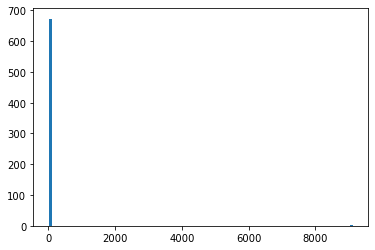

In [139]:
# plot the histogram of component sizes
hist = plt.hist(comp_sizes, bins=100)

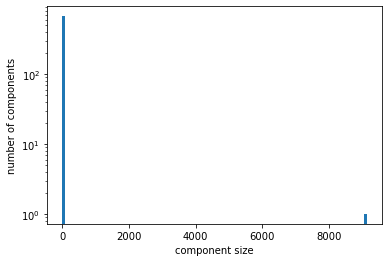

In [140]:
# histogram with logarithmic y scale
hist = plt.hist(comp_sizes, bins=100, log=True)
tx = plt.xlabel('component size')
ty = plt.ylabel('number of components')

In [141]:
# sizes of the ten largest components
comp_sizes[:10]

[9124, 88, 43, 31, 26, 23, 21, 18, 17, 16]

In [142]:
# let's make a new graph which is the subgraph of G corresponding to 
# the largest connected component
# let's find the largest component
largest_comp = components[0]
LCC = G.subgraph(largest_comp)

In [143]:
G.number_of_nodes()

11517

In [144]:
LCC.number_of_nodes()

9124

In [145]:
# let's plot the degree distribution inside the LCC
degrees = [LCC.degree(n) for n in LCC.nodes()]
degrees

[3,
 101,
 24,
 152,
 4,
 9,
 9,
 3,
 2,
 4,
 3,
 2,
 2,
 4,
 2,
 63,
 3,
 8,
 1,
 1,
 235,
 3,
 2,
 52,
 2,
 5,
 6,
 1,
 629,
 4,
 1,
 510,
 1,
 2,
 1,
 1,
 4,
 2,
 15,
 1,
 2,
 1,
 3,
 8,
 1,
 121,
 1,
 1,
 11,
 4,
 4,
 4,
 2,
 6,
 1,
 2,
 10,
 3,
 13,
 1,
 46,
 14,
 4,
 6,
 1,
 40,
 3,
 5,
 2,
 4,
 6,
 2,
 8,
 1,
 2,
 1,
 1,
 11,
 9,
 1,
 5,
 1,
 1,
 1,
 8,
 3,
 3,
 2,
 7,
 2,
 8,
 7,
 2,
 210,
 10,
 2,
 34,
 2,
 2,
 171,
 1,
 7,
 6,
 2,
 3,
 5,
 3,
 1,
 23,
 2,
 2,
 1,
 1,
 3,
 3,
 4,
 24,
 1,
 2,
 9,
 5,
 3,
 5,
 1,
 1,
 29,
 5,
 2,
 1,
 1,
 3,
 8,
 2,
 2,
 1,
 6,
 2,
 6,
 376,
 3,
 3,
 1,
 1,
 22,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 8,
 1,
 3,
 2,
 61,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 4,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 3,
 23,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 2

In [146]:
degrees.sort(reverse=True)
degrees

[911,
 629,
 537,
 510,
 376,
 317,
 314,
 294,
 240,
 235,
 230,
 219,
 210,
 192,
 171,
 170,
 160,
 160,
 160,
 152,
 152,
 121,
 117,
 114,
 112,
 110,
 101,
 97,
 96,
 93,
 93,
 87,
 84,
 82,
 71,
 69,
 63,
 61,
 59,
 57,
 54,
 54,
 53,
 52,
 52,
 50,
 47,
 46,
 43,
 42,
 42,
 41,
 40,
 40,
 40,
 39,
 38,
 38,
 37,
 37,
 36,
 36,
 36,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 31,
 30,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13

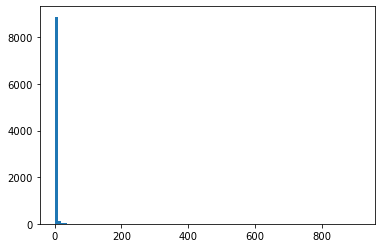

In [147]:

degree_array = np.array(degrees)
hist = plt.hist(degree_array, bins=100)

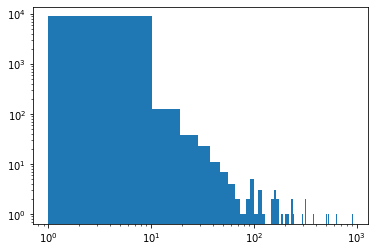

In [148]:

# using logarithmic scales
hist = plt.hist(degree_array, bins=100, log=True)
plt.xscale('log')

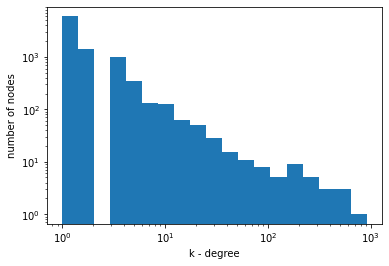

In [149]:
# logarithmic scale with logarithmic bins
N, bins, patches = plt.hist(degree_array, bins=np.logspace(0,np.log10(degree_array.max()+1), 20), log=True)
plt.xscale('log')
tx = plt.xlabel('k - degree')
ty= plt.ylabel('number of nodes')

0.9999999999999999


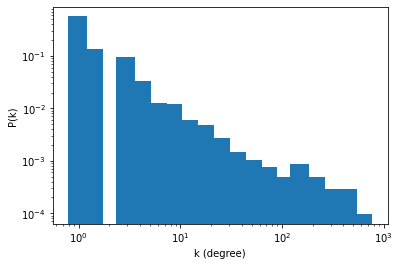

In [150]:
# Degree probability distribution (P(k))

# since we have logarithmic bins, we need to
# take into account the fact that the bins 
# have different lenghts when normalizing
bin_lengths = np.diff(bins) # lenght of each bin

summ = np.sum(N*bin_lengths)
normalized_degree_dist = N/summ

# check normalization:
print(np.sum(normalized_degree_dist*bin_lengths))

hist = plt.bar(bins[:-1], normalized_degree_dist, width=np.diff(bins))
plt.xscale('log')
plt.yscale('log')
tx = plt.xlabel('k (degree)')
ty = plt.ylabel('P(k)')

In [151]:
import random

def getGCsize(G):
    """ returns the size of the largest component of G"""
        
    return len(max(nx.connected_components(G), key=len))

In [152]:
# list that will contain the size of the GC as we remove nodes
rnd_attack_GC_sizes = []

# we take into account the undirected version of the graph
LCCundirected = nx.Graph(LCC)

nodes_list = list(LCCundirected.nodes())


while len(nodes_list) > 1:
    # add the size of the  current GC
    rnd_attack_GC_sizes.append(getGCsize(LCCundirected))
    
    # pick a random node
    rnd_node = random.choice(nodes_list)
    # remove from graph
    LCCundirected.remove_node(rnd_node)
    # remove from node list
    nodes_list.remove(rnd_node)

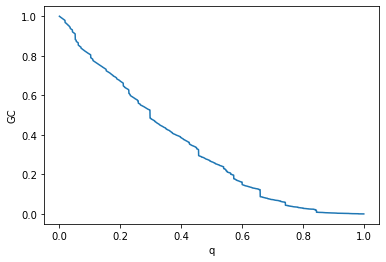

In [153]:
# convert list to numpy array
rnd_attack_GC_sizes = np.array(rnd_attack_GC_sizes)

# normalize by the initial size of the GC
GC_rnd = rnd_attack_GC_sizes/rnd_attack_GC_sizes[0]

# fraction of removed nodes
q = np.linspace(0,1,num=GC_rnd.size)

plt.plot(q,GC_rnd)
tx = plt.xlabel('q')
ty = plt.ylabel('GC')

In [154]:
# high degree attack
LCCundirected = nx.Graph(LCC)

# list of pairs (node, degree) sorted according the degree
node_deg_dict = dict(nx.degree(LCCundirected))
nodes_sorted = sorted(node_deg_dict, key=node_deg_dict.get)

# list that will contain the size of the GC as we remove nodes
hd_attack_GC_sizes = []

while len(nodes_sorted) > 1:
    
    hd_attack_GC_sizes.append(getGCsize(LCCundirected))
    
    #remove node according to their degree
    node = nodes_sorted.pop() # pop() removes and returns the last element
    LCCundirected.remove_node(node)

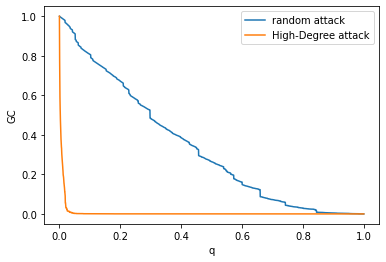

In [155]:
hd_attack_GC_sizes = np.array(hd_attack_GC_sizes)
GC_hd = hd_attack_GC_sizes/hd_attack_GC_sizes[0]
q = np.linspace(0,1,num=GC_hd.size)

plt.plot(q,GC_rnd, label='random attack')
plt.plot(q,GC_hd, label='High-Degree attack')
tx = plt.xlabel('q')
ty = plt.ylabel('GC')
_ = plt.legend()

In [156]:
#teleportation probability
alpha = 0.15

#adjacency matrix
nodelist = list(G.nodes())
A = nx.to_numpy_array(G, nodelist=nodelist)

#diagonal matrix of out degrees
deg_out_vect = np.array([float(max(G.out_degree(n),1)) for n in nodelist])
D_out_inv = np.diag(1/deg_out_vect)

# teleportation transition matrix
N = A.shape[1]
S = np.ones((N,N))*1/N

# full transition matrix
M = (1-alpha)*D_out_inv @ A + alpha*S

# for dangling nodes (nodes without out-edges), we force the random teleportation
dangling_nodes = np.where(A.sum(1) == 0)[0]
M[dangling_nodes,:] = S[dangling_nodes,:]

#initial walker distribution and 1st iteration
p_last = np.ones(N)*1/N
p = np.matmul(p_last, M)

# iterate until sufficient convergence
eps = 1.0e-8
i = 1
while np.linalg.norm(p - p_last, 2) > eps:
        p_last = p
        p = np.matmul(p, M)
        i += 1

print(i)

91


In [157]:
pg_ranking = np.array(np.argsort(p)[::-1])

pagerank_values = p[pg_ranking]
nodes_pagerank = [nodelist[r] for r in pg_ranking]
nodes_pagerank[:20]

['LBC',
 'KoolKat1025',
 'NickFerrariLBC',
 'LeoKearse',
 'LeaveEUOfficial',
 'SadiqKhan',
 'PoliticsJOE_UK',
 'MayorofLondon',
 'mariannaspring',
 'PrisonPlanet',
 'BrexitBassist',
 'PoliticsForAlI',
 'TJ_Knight',
 'ashindestad',
 'talkRADIO',
 'antiwokeuk',
 'Independent',
 'NKrankie',
 'metpoliceuk',
 'GBNfans']

In [158]:
names_pagerank = [G.nodes[n]['name'] for n in nodes_pagerank]
names_pagerank[:20]

['LBC',
 'KoolKat1025',
 'NickFerrariLBC',
 'LeoKearse',
 'LeaveEUOfficial',
 'SadiqKhan',
 'PoliticsJOE_UK',
 'MayorofLondon',
 'mariannaspring',
 'PrisonPlanet',
 'BrexitBassist',
 'PoliticsForAlI',
 'TJ_Knight',
 'ashindestad',
 'talkRADIO',
 'antiwokeuk',
 'Independent',
 'NKrankie',
 'metpoliceuk',
 'GBNfans']

### Compare page rank with degree
Top 20 nodes by degree:
- ('GoodLawProject', 4079)
- ('KoolKat1025', 911)
- ('LeoKearse', 629)
- ('LeaveEUOfficial', 537)
- ('SadiqKhan', 515)
- ('MayorofLondon', 376)
- ('BrexitBassist', 317)
- ('PoliticsJOE_UK', 314)
- ('mariannaspring', 294)
- ('PoliticsForAlI', 240)
- ('LBC', 235)
- ('PrisonPlanet', 230)
- ('NKrankie', 219)
- ('talkRADIO', 210)
- ('TJ_Knight', 192)
- ('metpoliceuk', 171)
- ('ashindestad', 170)
- ('MickeyD44314901', 160)
- ('DJBURNS_was', 160)
- ('Independent', 160)

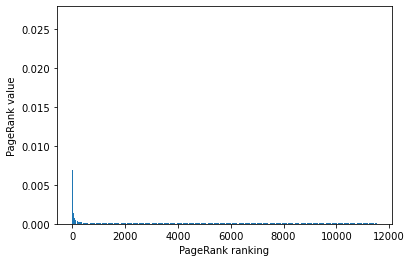

In [159]:
hist = plt.bar(np.arange(p.shape[0]),np.sort(p)[::-1])
ty = plt.ylabel('PageRank value')
tx = plt.xlabel('PageRank ranking')

In [160]:
# pagerank is a probability density
pagerank_values.sum()

0.999999999999597

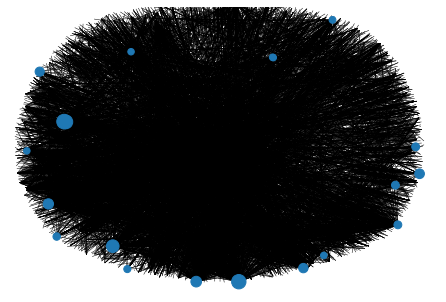

In [161]:
# draw the network of the top 20 nodes
nx.draw(G, nodelist=nodes_pagerank[:20], node_size=8000*pagerank_values[:20],width=0.5, arrows=False)

In [162]:
# First let's add the pagerank value as a node attribute
for n, pr in zip(nodes_pagerank,pagerank_values):
    if n in LCC:
        LCC.nodes[n]['page_rank'] = pr

### My play area

https://www.briggsby.com/personalized-pagerank

In [163]:
# this returns a list of set of nodes belonging to the 
# different (weakly) connected components
components_strong = list(nx.strongly_connected_components(G))

# sort the component according to their size
components_strong = list(sorted(components_strong, key=lambda x:len(x), reverse=True))

In [164]:
# make a list with the size of each component
comp_sizes_strong = []
for comp in components_strong:
    comp_sizes_strong.append(len(comp))
    
len(comp_sizes_strong)

11398

In [165]:
# sizes of the ten largest components
comp_sizes_strong[:20]

[5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2]

In [166]:
largest_comp_strong = components_strong[0]
LCC_strong = G.subgraph(largest_comp_strong)

In [167]:
nx.is_weighted(LCC_strong)  

False

In [168]:
LCC_strong.edges(data = True)

OutEdgeDataView([('KeithPrinceAM', 'Tony_Devenish', {'edge_id': 'KeithPrinceAM->Tony_Devenish'}), ('KeithPrinceAM', 'GLAConservative', {'edge_id': 'KeithPrinceAM->GLAConservative'}), ('GLAConservative', 'Tony_Devenish', {'edge_id': 'GLAConservative->Tony_Devenish'}), ('GLAConservative', 'FSBGtrLondon', {'edge_id': 'GLAConservative->FSBGtrLondon'}), ('GLAConservative', 'Councillorsuzie', {'edge_id': 'GLAConservative->Councillorsuzie'}), ('Tony_Devenish', 'GLAConservative', {'edge_id': 'Tony_Devenish->GLAConservative'}), ('Tony_Devenish', 'KeithPrinceAM', {'edge_id': 'Tony_Devenish->KeithPrinceAM'}), ('FSBGtrLondon', 'Councillorsuzie', {'edge_id': 'FSBGtrLondon->Councillorsuzie'}), ('Councillorsuzie', 'Tony_Devenish', {'edge_id': 'Councillorsuzie->Tony_Devenish'}), ('Councillorsuzie', 'GLAConservative', {'edge_id': 'Councillorsuzie->GLAConservative'}), ('Councillorsuzie', 'FSBGtrLondon', {'edge_id': 'Councillorsuzie->FSBGtrLondon'})])

In [169]:
LCC_strong.number_of_nodes()

# let's plot the degree distribution inside the LCC
degrees = [LCC_strong.degree(n) for n in LCC_strong.nodes()]
degrees

[3, 6, 5, 3, 5]

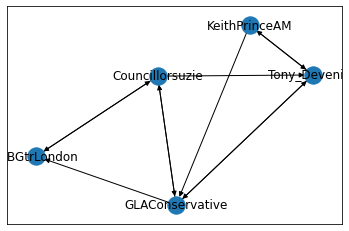

In [170]:
nx.draw_networkx(LCC_strong)

In [171]:
# the keys are the user_id
nodelist_string = list(LCC_strong.nodes.keys())
print(nodelist_string)

['KeithPrinceAM', 'GLAConservative', 'Tony_Devenish', 'FSBGtrLondon', 'Councillorsuzie']


In [172]:
print(LCC_strong.edges())

[('KeithPrinceAM', 'Tony_Devenish'), ('KeithPrinceAM', 'GLAConservative'), ('GLAConservative', 'Tony_Devenish'), ('GLAConservative', 'FSBGtrLondon'), ('GLAConservative', 'Councillorsuzie'), ('Tony_Devenish', 'GLAConservative'), ('Tony_Devenish', 'KeithPrinceAM'), ('FSBGtrLondon', 'Councillorsuzie'), ('Councillorsuzie', 'Tony_Devenish'), ('Councillorsuzie', 'GLAConservative'), ('Councillorsuzie', 'FSBGtrLondon')]


In [173]:
for u, v, d in LCC_strong.edges(data=True):
    d['weight'] = 1
for u,v,d in LCC_strong.edges(data=True):
    print (u,v,d)

KeithPrinceAM Tony_Devenish {'edge_id': 'KeithPrinceAM->Tony_Devenish', 'weight': 1}
KeithPrinceAM GLAConservative {'edge_id': 'KeithPrinceAM->GLAConservative', 'weight': 1}
GLAConservative Tony_Devenish {'edge_id': 'GLAConservative->Tony_Devenish', 'weight': 1}
GLAConservative FSBGtrLondon {'edge_id': 'GLAConservative->FSBGtrLondon', 'weight': 1}
GLAConservative Councillorsuzie {'edge_id': 'GLAConservative->Councillorsuzie', 'weight': 1}
Tony_Devenish GLAConservative {'edge_id': 'Tony_Devenish->GLAConservative', 'weight': 1}
Tony_Devenish KeithPrinceAM {'edge_id': 'Tony_Devenish->KeithPrinceAM', 'weight': 1}
FSBGtrLondon Councillorsuzie {'edge_id': 'FSBGtrLondon->Councillorsuzie', 'weight': 1}
Councillorsuzie Tony_Devenish {'edge_id': 'Councillorsuzie->Tony_Devenish', 'weight': 1}
Councillorsuzie GLAConservative {'edge_id': 'Councillorsuzie->GLAConservative', 'weight': 1}
Councillorsuzie FSBGtrLondon {'edge_id': 'Councillorsuzie->FSBGtrLondon', 'weight': 1}


### More playing around = based on Lab09

In [174]:
def connected_component_subgraphs(G):
    for c in nx.strongly_connected_components(G):
        yield G.subgraph(c)

connectedSubgraphs = connected_component_subgraphs(G)
connectedSubgraphs = list(connectedSubgraphs)
countComps = len(connectedSubgraphs)
print ("This graph has ", countComps, " many connected components")

This graph has  11398  many connected components


Number of nodes 5
Number of relations 11


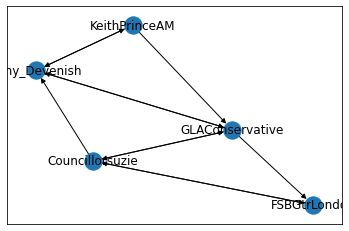

In [175]:
#Find the largest subgraph.
#Uses solution in the documentation: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html#networkx.algorithms.components.connected.connected_component_subgraphs
largestSubgraph = max(connectedSubgraphs,key=len)

#Count the number of authors and connections between authors
print("Number of nodes",nx.number_of_nodes(largestSubgraph))
print("Number of relations",nx.number_of_edges(largestSubgraph))



nx.draw_networkx(largestSubgraph)
plt.draw() 

In [176]:
import numpy as np

betweenValues = nx.betweenness_centrality(largestSubgraph)

# betweenValues is a dictionary, let's get the values and keys in separate lists
values = list(betweenValues.values())
keys = list(betweenValues.keys())

# find the index of the node with highest betweeness centrality
highestIndex = np.argmax(values)
print("The node id ", keys[highestIndex], " has the centrality degree of ", values[highestIndex])

The node id  GLAConservative  has the centrality degree of  0.3333333333333333


In [177]:
overallAverage = []
# now on to looking at clustering coefficients
for i in range(0, countComps):
    clustCoeff = nx.clustering( connectedSubgraphs[i])
    coeffVals = list(clustCoeff.values())
    overallAverage.append(np.average(coeffVals))
    #print ("Component: ", i, " Size of the component: ", len(connectedSubgraphs[i].nodes()),  " coefficient: ", np.average(coeffVals))

print ("Average clustering coefficent is: ", np.average(overallAverage))

Average clustering coefficent is:  0.0008339013592128174


## more playing around

In [178]:
largest_comp_2 = components[1]
LCC_2 = G.subgraph(largest_comp_2)

In [179]:
# let's plot the degree distribution inside the LCC
degrees_2 = [LCC_2.degree(n) for n in LCC_2.nodes()]
degrees_2

[1,
 12,
 1,
 1,
 1,
 1,
 1,
 64,
 1,
 1,
 1,
 3,
 2,
 5,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 11,
 1,
 1,
 5,
 1,
 13,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 1,
 6]